# Bayesian optimizer test and demo notebook

In [1]:
from bayesian_optimizer import BayesianOptimizer
from random import uniform
from numpy import array, arange

import matplotlib.pyplot as plt
%matplotlib inline 

### (1) Demo optimization of a 4D Rosenbrock function (this is hard for BO)

In [14]:
def Rosen(x):
    """The Rosenbrock function"""
    return -1.0*sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

**Generate a random sampling of the function to be optimized**

In [15]:
ranges = [(0.5,1.5), (0.5,1.5), (0.5,1.5), (0.5,1.5)]
#ranges = [(0.0,2.0), (0.0,2.0), (0.0,2.0), (0.0,2.0)]
halton = Halton(ranges)
features = []
fitness = []
for i in range(20):
    #x_rand = array([uniform(lower, upper) for lower, upper in ranges])
    x_rand = array(halton.Get())
    features.append(x_rand.tolist())
    fitness.append(Rosen(x_rand))

In [16]:
print fitness

[-5.2351725875535422, -57.923339159737914, -151.44452402142841, -85.816785224499341, -204.85688368714963, -70.654369659546887, -86.106718127218741, -218.1303743163221, -243.85574945472987, -45.324941210887175, -95.232903297624318, -42.17455619727258, -23.161787484336216, -217.3469048337935, -180.40299468874153, -82.275181904723055, -116.49456204899694, -93.846689851752473, -147.72020258346728, -235.86870918991823]


**Initialize the optimizer and regressor**

In [18]:
bayesian_optimizer = BayesianOptimizer()
bayesian_optimizer.InitalizeRegressor()
bayesian_optimizer.InitializeSuggestionEngine(num_suggestions=1, method='kg')
bayesian_optimizer.InitializeOptimizer(rand_starts=50, tol=1e-5)
bayesian_optimizer.InitialSamples(features, fitness)
bayesian_optimizer.SetRanges(ranges)

**Basic loop to iteratively optimize**

In [19]:
xs = []
ys = []
for i in range(30):
    if i % 10 == 0:
        print 'iteration %i' % i
    suggestions = bayesian_optimizer.Suggest()
    xs_batch = []
    ys_batch = []
    for suggestion in suggestions:
        xs_batch.append(suggestion)
        ys_batch.append(Rosen(array(suggestion)))
    xs.append(xs_batch)
    ys.append(ys_batch)
    bayesian_optimizer.AddSamples(xs_batch, ys_batch)

iteration 0
iteration 10
iteration 20


In [21]:
ys[0:]

[[-3.4606322197008987],
 [-5.5832232641227026],
 [-36.567877510547277],
 [-181.51831802848946],
 [-11.347927145492958],
 [-14.823187473575455],
 [-3.2608194693771457],
 [-19.499664941050451],
 [-26.180727875864783],
 [-8.5360104026338544],
 [-0.7034669730433829],
 [-1.3344797426351076],
 [-1.7057483067605068],
 [-27.425465390730871],
 [-4.8801488830062922],
 [-14.856285030125802],
 [-0.381557488637711],
 [-70.808597713276015],
 [-2.5207720206170219],
 [-0.63493688762595746],
 [-1.8042880176688547],
 [-7.5512459021110656],
 [-0.55056569700965585],
 [-1.66526208668038],
 [-1.9875316991027379],
 [-1.7552465822148413],
 [-1.3089332775161848],
 [-0.035967643510371738],
 [-1.6232353201594183],
 [-0.67188384817175051]]

In [5]:
bayesian_optimizer = BayesianOptimizer()
bayesian_optimizer.InitalizeRegressor()
bayesian_optimizer.InitializeSuggestionEngine(num_suggestions=3, method='kg', rand_starts__max_pred_fitness=200)
bayesian_optimizer.InitializeOptimizer(rand_starts=50, tol=1e-5)
bayesian_optimizer.InitialSamples(features, fitness)
bayesian_optimizer.SetRanges(ranges)

In [6]:
xs = []
ys = []
for i in range(30):
    if i % 10 == 0:
        print 'iteration %i' % i
    suggestions = bayesian_optimizer.Suggest()
    xs_batch = []
    ys_batch = []
    for suggestion in suggestions:
        xs_batch.append(suggestion)
        ys_batch.append(Rosen(array(suggestion)))
    xs.append(xs_batch)
    ys.append(ys_batch)
    bayesian_optimizer.AddSamples(xs_batch, ys_batch)

iteration 0
iteration 10
iteration 20


In [9]:
ys

[[-65.403542576718067, -75.603695263825657, -379.35168464461839],
 [-32.206852830727819, -35.701691230892365, -36.716176582406675],
 [-24.261455922313917, -27.788085850343609, -28.73291976880822],
 [-15.876272481506163, -15.999510138731733, -15.991378139410461],
 [-12.308132232280828, -12.290578369075487, -12.277783076327601],
 [-122.26728339995175, -9.1946002095957251, -8.4440169979818638],
 [-8.4538528313976844, -8.6571842904219825, -8.7134983992586523],
 [-7.8305700424320719, -7.8493812068104205, -7.8524932534050755],
 [-49.068986296491694, -68.342412794042275, -56.277372112779879],
 [-7.4952396661302654, -41.496643131017592, -7.4286153890145279],
 [-7.4665125437541278, -8.0920272493853087, -7.6048152356416967],
 [-7.189689449091512, -1203.0, -30.35997977204336],
 [-6.399702437436309, -6.3636287536512013, -7.1175613115962797],
 [-5.62051467174126, -5.6153678904000977, -5.5055972907534692],
 [-4.9279598013403891, -4.9200801975174819, -4.9561694783324395],
 [-4.5435044046758772, -5.26

In [13]:
fitness

[-199.51410281626232,
 -219.10943051744778,
 -906.21769063924933,
 -167.30126084515678,
 -1003.8977574175101,
 -388.92336666194268,
 -297.1593921820745,
 -455.21053711865227,
 -75.637566725778527,
 -533.36947217538227,
 -304.88801717680622,
 -663.9522339839516,
 -60.518205316818367,
 -800.34864680955184,
 -56.166260779243984,
 -1506.8908300183271,
 -179.38757866726837,
 -723.62699017024158,
 -800.67122079237424,
 -210.99978507212703]

In [20]:
max(ys)

-1.0990169904400786

In [21]:
max(fitness)

-68.451172236287661

In [9]:
bayesian_optimizer.y_virtual_

[-2.2523411253730359, -1.0712801624597716, -21.958882413405973]

In [13]:
 Rosen(array(bayesian_optimizer.X_virtual_[0]))

-22.332366058439675

In [10]:
bayesian_optimizer.X_virtual_

[[0.9362230305436231,
  0.9635284796419378,
  0.9398963470769153,
  0.9303873443549345],
 [0.8842444802700317,
  0.8705418100500977,
  0.8002847818305886,
  0.692575036421395],
 [0.5552498831551947,
  0.7278643335063496,
  0.5629005252360438,
  0.2408752733307346]]

**Checking to see if it reproduces a function properly**

In [2]:
from halton import Halton

In [3]:
def Polynomial(x):
    return 1.5 - 2.0*x + 3.3*x**2.0 - 0.1*x**4.0

In [4]:
ranges = [(-6.0,6.0)]
halton = Halton(ranges)
features = []
fitness = []
for i in range(1):
    #x_rand = array([uniform(lower, upper) for lower, upper in ranges])
    x_rand = array(halton.Get())
    features.append(x_rand.tolist())
    fitness.append(Polynomial(x_rand[0]))

In [5]:
print features

[[0.0]]


In [6]:
print fitness

[1.5]


In [7]:
bayesian_optimizer = BayesianOptimizer()
bayesian_optimizer.InitalizeRegressor(white_noise=True)
bayesian_optimizer.InitializeSuggestionEngine(num_suggestions=1, method='kg')
bayesian_optimizer.InitializeOptimizer(rand_starts=100, tol=1e-5)
bayesian_optimizer.InitialSamples(features, fitness)
bayesian_optimizer.SetRanges(ranges)

In [8]:
x_points = arange(-6, 6, 0.1)
y_points = Polynomial(x_points)

In [9]:
Y_pred = []
EI_pred = []
xs = []
ys = []
for i in range(100):
    if i % 10 == 0:
        print 'iteration %i' % i
    suggestions = bayesian_optimizer.Suggest()
    Y_pred.append(array([bayesian_optimizer.gaussian_process_regressor_.predict([[x]], return_std = False)[0] for x in x_points]))
    EI_pred.append(array([bayesian_optimizer.ExpectedImprovement(array([x])) for x in x_points]))
    xs_batch = []
    ys_batch = []
    for suggestion in suggestions:
        xs_batch.append(suggestion)
        ys_batch.append(Polynomial(suggestion[0]))
    xs.append(xs_batch)
    ys.append(ys_batch)
    bayesian_optimizer.AddSamples(xs_batch, ys_batch)

iteration 0
iteration 10
iteration 20
iteration 30
iteration 40
iteration 50
iteration 60
iteration 70
iteration 80
iteration 90


In [14]:
x_points

array([ -6.00000000e+00,  -5.90000000e+00,  -5.80000000e+00,
        -5.70000000e+00,  -5.60000000e+00,  -5.50000000e+00,
        -5.40000000e+00,  -5.30000000e+00,  -5.20000000e+00,
        -5.10000000e+00,  -5.00000000e+00,  -4.90000000e+00,
        -4.80000000e+00,  -4.70000000e+00,  -4.60000000e+00,
        -4.50000000e+00,  -4.40000000e+00,  -4.30000000e+00,
        -4.20000000e+00,  -4.10000000e+00,  -4.00000000e+00,
        -3.90000000e+00,  -3.80000000e+00,  -3.70000000e+00,
        -3.60000000e+00,  -3.50000000e+00,  -3.40000000e+00,
        -3.30000000e+00,  -3.20000000e+00,  -3.10000000e+00,
        -3.00000000e+00,  -2.90000000e+00,  -2.80000000e+00,
        -2.70000000e+00,  -2.60000000e+00,  -2.50000000e+00,
        -2.40000000e+00,  -2.30000000e+00,  -2.20000000e+00,
        -2.10000000e+00,  -2.00000000e+00,  -1.90000000e+00,
        -1.80000000e+00,  -1.70000000e+00,  -1.60000000e+00,
        -1.50000000e+00,  -1.40000000e+00,  -1.30000000e+00,
        -1.20000000e+00,

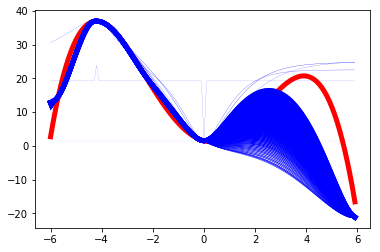

In [10]:
#things to plot
lw = 0.05
plt.plot(x_points, y_points, c="r", linestyle = '-', linewidth = 5, label = "Train")
for y_pred in Y_pred[0:100]:
    plt.plot(x_points, y_pred, linestyle = '-', c = 'b', linewidth =lw, label = "Train")
    lw = lw + 0.05
    
#model = bayesian_random_forest_optimizer.bootstrap_models[0]
#y_pred = model.predict(x_col)
#plt.plot(x, y_pred, c="b", linestyle = '-', linewidth = 5, label = "Train")
#plt.scatter(points, fitness, c="b", s=90, alpha=0.9)

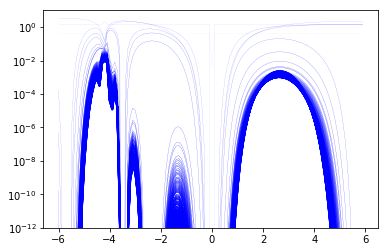

In [11]:
#things to plot
lw = 0.02
#plt.plot(x_points, y_points, c="r", linestyle = '-', linewidth = 5, label = "Train")
for ei_pred in EI_pred[0:]:
    plt.plot(x_points, ei_pred, linestyle = '-', c = 'b', linewidth =lw, label = "Train")
    lw = lw + 0.02
plt.ylim(0.000000000001, 10)
plt.yscale('log')

In [13]:
ys

[[36.99405813217163],
 [36.991962492655134],
 [14.635449333801489],
 [33.77619990287413],
 [-21.299999999999997],
 [36.58166310781803],
 [21.385942850126852],
 [36.951889794318134],
 [36.98001287435365],
 [36.82235084316345],
 [36.98401582069865],
 [36.9952764504155],
 [36.98271345697367],
 [36.99383400651516],
 [36.99507136224299],
 [36.979063239814636],
 [36.99341729726014],
 [36.9936515957843],
 [36.99183028217477],
 [36.994838821919885],
 [36.975076019058115],
 [36.99060521112631],
 [36.99522285562426],
 [36.99522587348502],
 [36.99472731367294],
 [36.99115407781893],
 [36.99349578385613],
 [36.99514452159785],
 [36.99478830534062],
 [36.991816139340465],
 [36.99185169518056],
 [36.993837135914276],
 [36.99527860103164],
 [36.99453775056048],
 [36.969559797352304],
 [36.99149623388351],
 [36.995285468892575],
 [36.995164835156274],
 [36.995176721718565],
 [36.99525539437192],
 [36.9843847716227],
 [36.99463448541667],
 [36.99471163225002],
 [36.99525008186051],
 [36.99270990605068]

In [115]:
bayesian_optimizer.X_

[[0.0],
 [-4.21875],
 [-4.21874997859161],
 [-4.218750029911325],
 [-4.218750028495364],
 [-4.218750161311195],
 [-4.218750690148054],
 [-4.218751514864318],
 [-4.218751184181312],
 [-4.218751676835951],
 [-4.218752595703349],
 [-4.218753507728049],
 [-4.218754531629923],
 [-4.218759493207736],
 [-4.218779344024542],
 [-4.219024710562787],
 [-4.22350609799024],
 [-4.238709367177222],
 [-4.207048157425576],
 [-4.203311312606457],
 [-4.203472859147806],
 [-4.213813119364362],
 [-4.203363160711004],
 [-4.203244805210804],
 [-4.203314711337923],
 [-4.203296741942638],
 [-4.20325640513286],
 [-4.203235739930815],
 [-4.203041417378778],
 [-4.20320686839225],
 [-4.203180176098715],
 [-4.203149430328133],
 [-4.20314682738442],
 [-4.2031788809966635],
 [-4.203859637823006],
 [-4.201909105942445],
 [-4.203139320915289],
 [-4.2031955593162404],
 [-4.184536759064294],
 [-4.204900861073781],
 [-4.20478485844727],
 [-4.204900503118738],
 [-4.205661370054708],
 [-4.206356782877366],
 [-4.204684792360

In [47]:
x = arange(-6, 6, 0.1)

In [48]:
x

array([ -6.00000000e+00,  -5.90000000e+00,  -5.80000000e+00,
        -5.70000000e+00,  -5.60000000e+00,  -5.50000000e+00,
        -5.40000000e+00,  -5.30000000e+00,  -5.20000000e+00,
        -5.10000000e+00,  -5.00000000e+00,  -4.90000000e+00,
        -4.80000000e+00,  -4.70000000e+00,  -4.60000000e+00,
        -4.50000000e+00,  -4.40000000e+00,  -4.30000000e+00,
        -4.20000000e+00,  -4.10000000e+00,  -4.00000000e+00,
        -3.90000000e+00,  -3.80000000e+00,  -3.70000000e+00,
        -3.60000000e+00,  -3.50000000e+00,  -3.40000000e+00,
        -3.30000000e+00,  -3.20000000e+00,  -3.10000000e+00,
        -3.00000000e+00,  -2.90000000e+00,  -2.80000000e+00,
        -2.70000000e+00,  -2.60000000e+00,  -2.50000000e+00,
        -2.40000000e+00,  -2.30000000e+00,  -2.20000000e+00,
        -2.10000000e+00,  -2.00000000e+00,  -1.90000000e+00,
        -1.80000000e+00,  -1.70000000e+00,  -1.60000000e+00,
        -1.50000000e+00,  -1.40000000e+00,  -1.30000000e+00,
        -1.20000000e+00,

In [58]:
bayesian_optimizer.gaussian_process_regressor_.predict([[2.4]], return_std = False)[0]

6.1062782093520092

In [7]:
bayesian_optimizer.gaussian_process_regressor_

GaussianProcessRegressor_(nu=1.5)

In [23]:
import ghalton
sequencer = ghalton.Halton(3)

In [31]:
points = sequencer.get(1)
points

[[0.75, 0.1111111111111111, 0.6]]

In [16]:
0-1

-1

In [ ]:
x_l x_u

In [ ]:
[x_l - x_l, x_u - x_l]

In [33]:
import ghalton

class Halton:
    def __init__(self, ranges):
        self.num_dim = len(ranges)
        self.lower, self.upper = zip(*ranges)
        self.sequencer = ghalton.Halton(self.num_dim)
        return None
    def Get(self, num_points=1):
        point = self.sequencer.get(1)[0]
        scaled_point = []
        for i in range(self.num_dim):
            scaled_point.append(point[i]*(self.upper[i] - self.lower[i]) + self.lower[i])
        return scaled_point

In [34]:
halton = Halton([(-2,0),(-12,-11),(0,1)])

In [38]:
halton.Get()

[-1.75, -11.555555555555555, 0.8]

In [32]:
(-11 - (-12))*0.1111111111 + -12

-11.8888888889